# Рабочая тетрадь 8
## Ломоносов Георгий Алексеевич

### Теоретический материал - Кластеризация
<p>Кластеризация — разбиение множества объектов на подмножества, называемые кластерами. Кластеризация, будучи математическим алгоритм имеет широкое применение во многих сферах: начиная с таких естественно научных областей как биология и физиология, и заканчивая маркетингом в социальных сетях и поисковой оптимизацией. Цель – разделить данные таким образом, чтобы точки, находящие в одном и том же кластере, были очень схожи друг с другом, а точки, находящиеся в разных кластерах, отличались друг от друга. Как и алгоритмы классификации, алгоритмы кластеризации присваивают (или прогнозируют) каждой точке данных номер кластера, которому она принадлежит.</p>
<p>Задача кластеризации относится к широкому классу задач обучения без учителя. Кластеризацию применяют для анализа и поиска признаков по которым можно объединить объекты, сжатия данных и поиска новизны (что не входит ни в один кластер) В чем отличие классификации и кластеризации: при классификации у вас есть набор предопределенных классов, вы обучаете ИИ на наборе примеров и потом хотите знать, к какому классу принадлежит новый объект. При кластеризации вы используете алгоритм, который пытается сгруппировать набор объектов и определить, существует ли какая-либо взаимосвязь между объектами.</p>
<p><b>Метод k-средних</b></p>
<p>Кластеризация k-средних – один из самых простых и наиболее часто используемых алгоритмов кластеризации. Сначала выбирается число кластеров k. После выбора значения k алгоритм k-средних отбирает точки, которые будут представлять центры кластеров (cluster centers). Затем для каждой точки данных вычисляется его евклидово расстояние до каждого центра кластера. Каждая точка назначается ближайшему центру кластера. Алгоритм вычисляет центроиды (centroids) – центры тяжести кластеров. Каждый центроид – это вектор, элементы которого представляют собой средние значения характеристик, вычисленные по всем точкам кластера. Центр кластера смещается в его центроид. Точки заново назначаются ближайшему центру кластера. Этапы изменения центров кластеров и переназначения точек итеративно повторяются до тех пор, пока границы кластеров и расположение центроидов не перестанут изменяться, т.е. на каждой итерации в каждый кластер будут попадать одни и те же точки данных.</p>
<p>Алгоритм k-средних, наверное, самый популярный и простой алгоритм кластеризации и очень легко представляется в виде простого псевдокода:</p>
<ol>
    <li>Выбрать количество кластеров k, которое нам кажется оптимальным для наших данных.</li>
    <li>Высыпать случайным образом в пространство наших данных k точек (центроидов).</li>
    <li>Для каждой точки нашего набора данных посчитать, к какому центроиду она ближе.</li>
    <li>Переместить каждый центроид в центр выборки, которую мы отнесли к этому центроиду.</li>
    <li>Повторять последние два шага фиксированное число раз, либо до тех пор пока центроиды не "сойдутся" (обычно это значит, что их смещение относительно предыдущего положения не превышает какого-то заранее заданного небольшого значения).</li>
<p>Стоит заметить, что можно рассчитывать расстояние между центройдами по любой метрике (Евклидовой, Хемминговой и т.д.).</p>

<p>Сгенерируем 2D-набор данных, содержащий 4 разных больших объекта, а затем применим алгоритм k-средних, чтобы увидеть результат.</p>

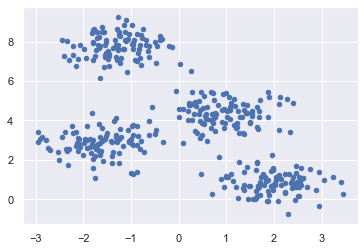

In [4]:
# начнем с импорта необходимых пакетов
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
# сгенерируем данные
from sklearn.datasets import make_blobs
x, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(x[:, 0], x[:, 1], s=20)
plt.show()

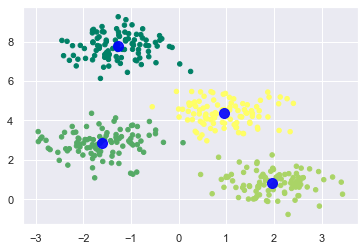

In [5]:
# Затем создадим объектт KMeans вместе с указанием количества кластеров
# и обучим модель и сделаем прогноз следующим образом:
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
# Построим и визуализируем центры кластера, выбранные с помощью k-средних оценки Python 
from sklearn.datasets import make_blobs
x, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=20, cmap='summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=.9)
plt.show()

#### 1.1.1 Пример
<p>Проведем кластеризацию K-средних к набору простых цифр. K-means попытается идентифицировать похожие цифры</p>

In [6]:
# Начнем с импорта необходимых пакетов
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

# загрузим набор цифр из sklearn
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [7]:
# выполним кластеризацию
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

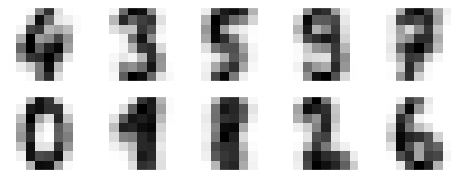

In [8]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

#### Задание 1
Дан массив данных. Требуется провести кластерный анализ данных методом k-средних. Поэкспериментируйте с количеством кластеров.

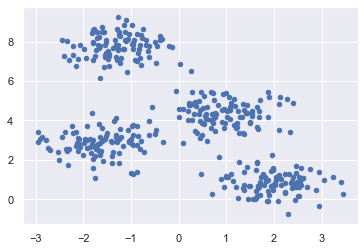

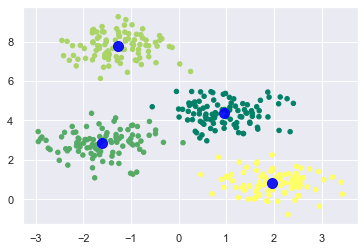

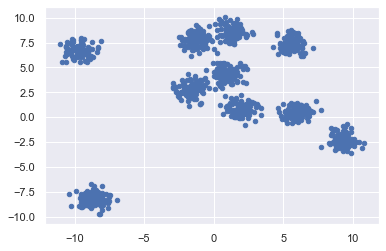

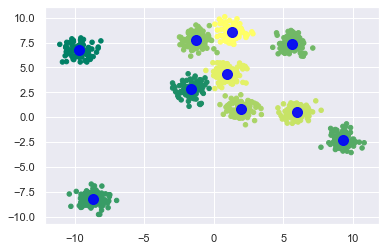

In [16]:
def cluster_analysis(x, clusters):
    x, y_true = make_blobs(n_samples=clusters * 100, centers=clusters, cluster_std=.6, random_state=0)
    plt.scatter(x[:, 0], x[:, 1], s=20)
    plt.show()
    
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(x)
    y_kmeans = kmeans.predict(x)
    
    x, y_true = make_blobs(n_samples=clusters * 100, centers=clusters, cluster_std=.6, random_state=0)
    plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=20, cmap='summer')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=.9)
    plt.show()
    
    
X = np.array([[5, 3],
             [10, 15],
             [15, 15],
             [24, 10],
             [30, 45],
             [85, 70],
             [71, 80],
             [60, 78],
             [55, 52],
             [80, 91]])
cluster_analysis(X, 4) # количество кластеров = 4
cluster_analysis(X, 10) # количество кластеров = 10

#### Задание 2
Выполните кластеризацию для набора данных ирисов Фишера. Выполните предсказания для модели. Поэкспериментируйте с количеством кластеров.

(150, 4)
(4, 4)


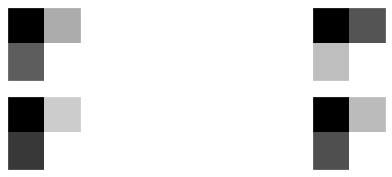

In [71]:
from sklearn.datasets import load_iris


def clusterization(x, amount):
    print(x.data.shape)
    kmeans = KMeans(n_clusters=amount, random_state=0)
    clusters = kmeans.fit_predict(x.data)
    print(kmeans.cluster_centers_.shape)
    
    fig, ax = plt.subplots(amount // 2, 2, figsize=(10, 3))
    centers = kmeans.cluster_centers_.reshape(amount, 2, 2)
    for axi, center in zip(ax.flat, centers):
        axi.set(xticks=[], yticks=[])
        axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
        

X = load_iris()
clusterization(X, 4)

(150, 4)
(10, 4)


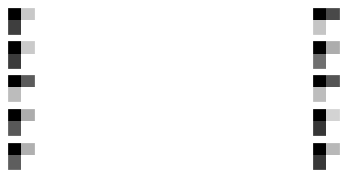

In [72]:
clusterization(X, 10)

### Теоретический материал - Иерархическая кластеризация
<p>Алгомеративная кластеризация относится к семейству алгоритмов кластеризации, в основе которых лежат одинаковые принципы: алгоритм начинает свою работу с того, что каждую точку данных заносит в свой собственный кластер и по мере выполнения объединяет два наиболее схожих между собой кластера до тех пор, пока не будет удовлетворен определенный критерий остановки. Зачастую данным критерием выступает это количество кластеров, поэтому схожие между собой кластеры объединяются до тех пор, пока не останется заданное число кластеров.</p>
<p>Результатом агломеративной кластеризации является иерархическая кластеризация. Кластеризация выполняется итеративно, и каждая точка совершает путь от отдельной точки-кластера до участника итогового кластера. На каждом промежуточном шаге происходит кластеризация данных (с разным количеством кластеров). Иногда полезно сразу взглянуть на все возможные кластеризации. Следующий пример показывает наложение всех возможных кластеризаций, показанных на рис. и дает некоторое представление о том, как каждый кластер распадается на более мелкие кластеры.</p>

#### 1.1.2 Пример
Построить дендрограмму для заданного массива данных.

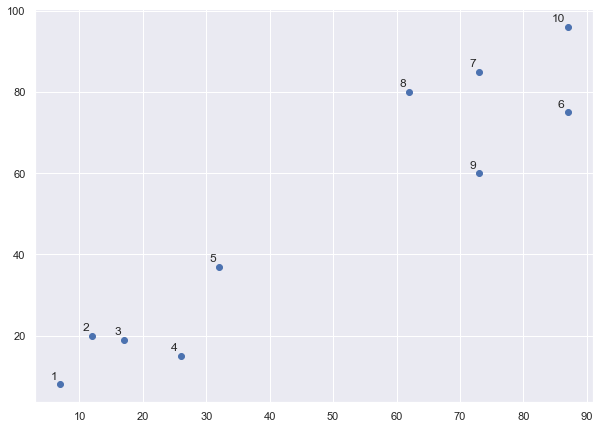

In [74]:
import matplotlib.pyplot as plt
import numpy as np
X = np.array(
[[7, 8], [12, 20], [17, 19], [26, 15], [32, 37], [87, 75], [73, 85], [62, 80], [73, 60], [87, 96]])
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=.1)
plt.scatter(X[:, 0], X[:, 1], label='True Position')
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
    label, xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')
plt.show()

Далее построим дендрограмму для точек данных с помощью библиотеки Scipy

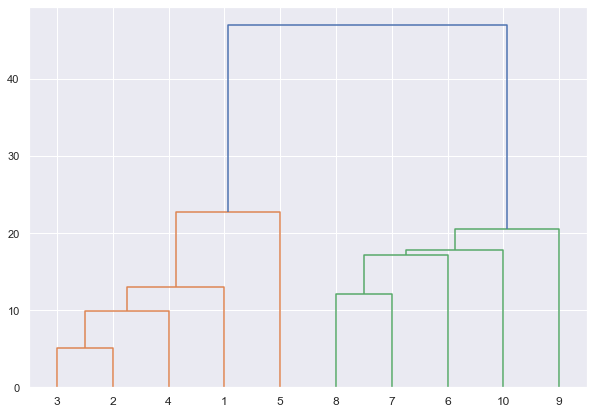

In [76]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(X, 'single')
label_list = range(1, 11)
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=label_list, distance_sort='descending', show_leaf_counts=True)
plt.show()

Далее нам нужно импортировать класс для кластеризации и вызвать его метод fit_predict для прогнозирования кластера.

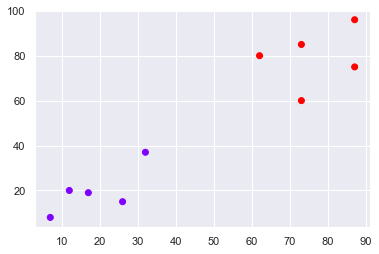

In [77]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_, cmap='rainbow')

#### Пример
<p>В этом примере мы выполним иерархическую кластеризацию реальных данных и посмотрим, как ее можно использовать для решения реальной проблемы. Выполним кластеризацию данных по набору https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv</p>
<p>Задача, которую мы собираемся решить в этом разделе, состоит в том, чтобы разделить клиентов на разные группы в зависимости от их покупательских тенденций.</p>

In [78]:
# импортируем библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# загрузим набор данных
url = r'https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv'
customer_data = pd.read_csv(url)
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [79]:
customer_data.shape

(200, 5)

Наш набор данных состоит из пяти столбцов. Чтобы просмотреть результаты в двумерном пространстве, мы сохраним только два из них:«Годовой доход» (в тысячах долларов) и «Оценка расходов» (1–100). Столбец «Оценка расходов» показывает, как часто человек тратит деньги в торговом центре по шкале от 1 до 100, где 100 — это самый высокий расход. Выполним следующий скрипт, чтобы отфильтровать первые три столбца из нашего набора данных:

In [103]:
data = customer_data.iloc[:, 3:5].values

Наш набор данных состоит из пяти столбцов. Чтобы просмотреть результаты в двумерном пространстве, мы сохраним только два из них:«Годовой доход» (в тысячах долларов) и «Оценка расходов» (1–100). Столбец «Оценка расходов» показывает, как часто человек тратит деньги в торговом центре по шкале от 1 до 100, где 100 — это самый высокий расход. Выполним следующий скрипт, чтобы отфильтровать первые три столбца из нашего набора данных:

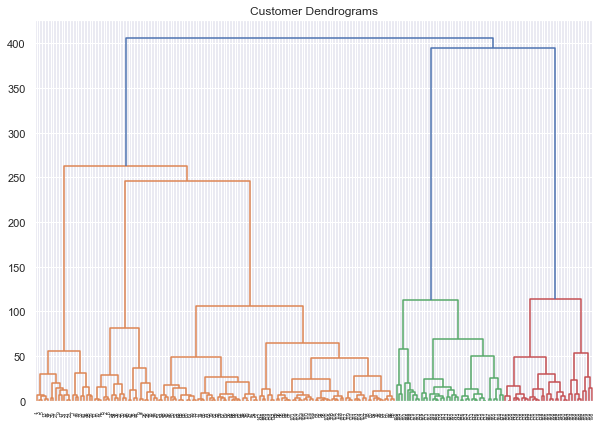

In [104]:
import scipy.cluster.hierarchy as shc
#figure(figsize=(28, 12), dpi=180)
plt.figure(figsize=(10, 7))
plt.title('Customer Dendrograms')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

<p>Если мы нарисуем горизонтальную линию, которая проходит через самое длинное расстояние без горизонтальной линии, мы получим 5 кластеров. Теперь мы знаем количество кластеров для нашего набора данных, следующим шагом будет группировка точек данных в эти пять кластеров.</p>
<p>Для этого мы снова воспользуемся классом AgglomerativeClustering библиотеки sklearn.cluster.</p>

In [105]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

В качестве последнего шага давайте построим кластеры, чтобы увидеть, как на самом деле были сгруппированы наши данные:

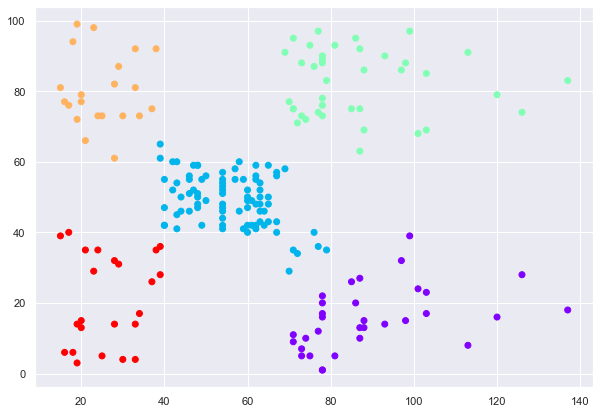

In [106]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=cluster.labels_, cmap='rainbow')

#### Задание
Выполните иерархическую кластеризацию для набора данных об ирисах Фишера. При этом необходимо использовать любые два признака (всего их четыре).

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris_data = load_iris()
data = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [92]:
data.shape

(150, 4)

In [93]:
data = data.iloc[:, 2:4].values

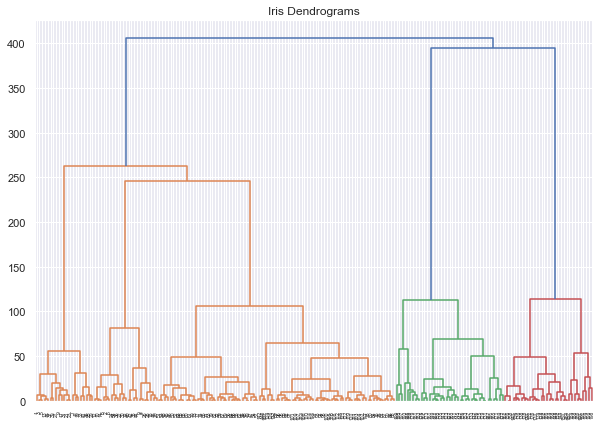

In [107]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title('Iris Dendrograms')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [108]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

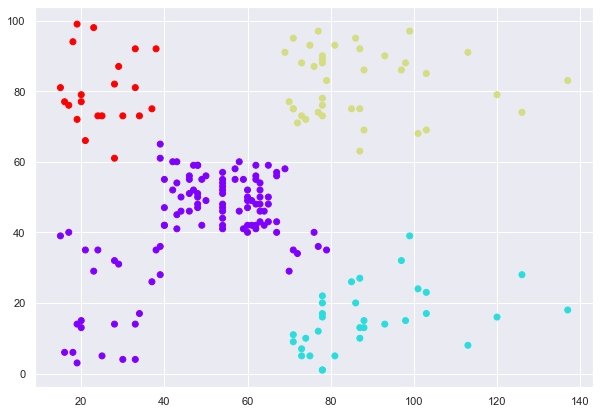

In [109]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=cluster.labels_, cmap='rainbow')